# Unidad Temática 2 

## Práctico Domiciliario 4

<br/>

# Ejercicio 1

## 1. Importar las librerías necesarias

Se importan las librerías `numpy` y `pandas` para trabajar con los datos. Además, se importan las librerías `matplotlib` y `seaborn` para realizar los gráficos, Se configura `seaborn` para que los gráficos se muestren con el estilo `whitegrid` y `matplotlib` para que los gráficos se muestren en el notebook.

También se importa `warnings` para evitar que se muestren los mensajes de advertencia. Y por último se importa `os` para poder acceder a los archivos del sistema.

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os 
print(os.listdir("./input"))

['gender_submission.csv', 'test.csv', 'train.csv']


## 2. Cargar y ver el dataset

Se cargan los archivos de train y test en los dataframes `df_train` y `df_test` respectivamente, utilizando la función `read_csv` de `pandas`. 

In [2]:
training = pd.read_csv("./input/train.csv")
testing = pd.read_csv("./input/test.csv")

In [3]:
training.head() # Muestra las primeras 5 filas del dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Se utiliza la función `head` para mostrar las primeras 5 filas de cada dataframe. Aún así a simple vista resulta difícil ver si hay valores nulos en el dataset.

Lo siguiente será procesarlos antes de comenzar a trabajar con ellos.

In [4]:
print(training.keys()) # Muestra los nombres de las columnas
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print("Aquí están las características numéricas:")
print(num_values)

Aquí están las características numéricas:
Age     float64
Fare    float64
dtype: object


In [6]:
training.describe() # Muestra un resumen de las características numéricas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Utilizar la función `describe` nos permite tener un conocimiento más certero de los datos que tenemos en el dataset. En este caso, podemos ver que hay 891 filas en el dataset, y que la edad promedio de los pasajeros es de 29.7 años. También podemos ver que la tarifa promedio del ticket es de 32.2, y que el 75% de los pasajeros pagó menos de 31.0 por su ticket.

## 3. Manejo de valores NaN (Imputación)

Existen valores Nan en el dataset, además la columna `Cabin` tiene muchos valores nulos. Por lo tanto, se decide llenar los faltantes con valores de reemplazo. Lo que nos permitirá trabajar con el dataset sin perder información, este proceso se conoce como `imputación`.

In [7]:
def null_table(training, testing):
    print("Data Frame Training")
    print(pd.isnull(training).sum()) # Muestra la cantidad de valores nulos por columna
    print(" ")
    print("Data Frame Testing")
    print(pd.isnull(testing).sum()) # Muestra la cantidad de valores nulos por columna

null_table(training, testing) # Muestra la cantidad de valores nulos por columna

Data Frame Training
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Data Frame Testing
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Como se puede apreciar la columna `Cabin` tiene muchos valores nulos, y la columna `Ticket` no aporta información relevante para el análisis. Por lo tanto, se decide eliminar ambas columnas del dataset. Ya que probablemente no aporten información relevante para el análisis.

In [8]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Data Frame Training
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Data Frame Testing
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


A continuación se revisa la columna edad (`Age`) para ver si en la comparación de testing y training hay valores sesgados o simétricos. Esto nos podria ayudar a decidir que valor utilizar para reemplazar los valores nulos.

<Axes: xlabel='Age', ylabel='Density'>

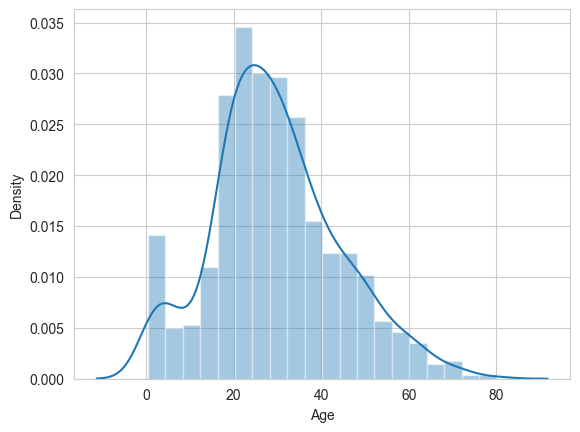

In [9]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

Al parecer la esta ligeramente sesgada a la derecha, por lo que se aplicará la mediana para reemplazar los valores faltantes.

In [10]:
# La mediana será un mejor valor para completar los valores nulos
training["Age"].fillna(training["Age"].median(), inplace = True) # Reemplaza los valores nulos por la mediana
testing["Age"].fillna(testing["Age"].median(), inplace = True) # Reemplaza los valores nulos por la mediana
training["Embarked"].fillna("S", inplace = True) # Reemplaza los valores nulos por "S"
testing["Fare"].fillna(testing["Fare"].median(), inplace = True) # Reemplaza los valores nulos por la mediana

# Finalmente se muestra que no hay valores nulos
null_table(training, testing) 

Data Frame Training
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Data Frame Testing
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


Como se puede apreciar, ya no hay valores nulos o faltantes en el dataset.


In [11]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [12]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


## 4. Trazar y visualizar los datos

Una parte importante es visualizar los datos para poder entenderlos mejor. Se pueden observar tendencias y patrones que no se pueden apreciar con los números.
Para ello se pueden realizar diferentes tipos de gráficos, que permitan ver las características de los datos que queremos estudiar.

<br/>

**Género** 

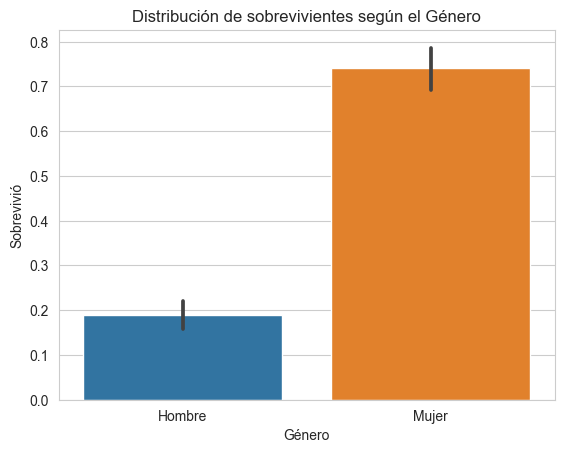

Total de personas que sobrevivieron es: 342
Proporción de Mujeres que sobrevivieron:
0.6812865497076024
Proporción de Hombres que sobrevivieron:
0.31871345029239767


In [13]:
# Se puede ignorar el dataset de testing por ahora
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribución de sobrevivientes según el Género")
plt.xlabel("Género")
plt.ylabel("Sobrevivió")
plt.xticks([0,1],["Hombre", "Mujer"])
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total de personas que sobrevivieron es: " + str((total_survived_females + total_survived_males)))
print("Proporción de Mujeres que sobrevivieron:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proporción de Hombres que sobrevivieron:")
print(total_survived_males/(total_survived_females + total_survived_males))

> Se puede observar que la cantidad de mujeres que sobrevivieron es significativamente superior a la de los hombres.

<br/>
La afirmación anterior se puede utilizar para realizar una predicción de los sobrevivientes, ya que se puede asumir que las mujeres tienen más probabilidades de sobrevivir que los hombres. Lo siguiente sera ver si la clase en la que viajaban también influye en la probabilidad de sobrevivir.

<br/>

**Clase**

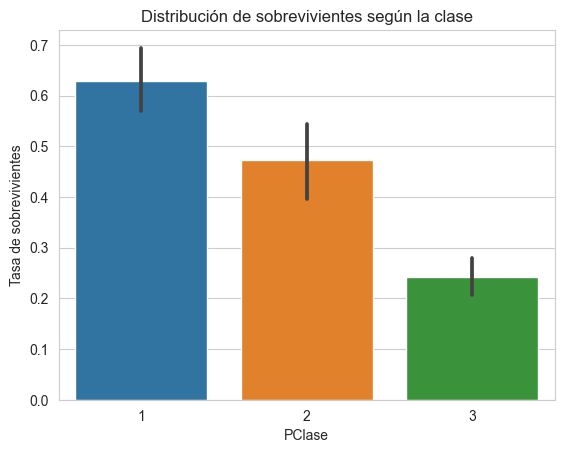

Total de personas sobrevivientes es: 342
Proporción de clase 1 que sobrevivió:
0.39766081871345027
Proporción de clase 2 que sobrevivió:
0.2543859649122807
Proporción de clase 3 que sobrevivió:
0.347953216374269


In [14]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Tasa de sobrevivientes")
plt.xlabel("PClase")
plt.title("Distribución de sobrevivientes según la clase")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total de personas sobrevivientes es: " + str(total_survived_class))
print("Proporción de clase 1 que sobrevivió:")
print(total_survived_one/total_survived_class)
print("Proporción de clase 2 que sobrevivió:")
print(total_survived_two/total_survived_class)
print("Proporción de clase 3 que sobrevivió:")
print(total_survived_three/total_survived_class)

Indica que mayor cantidad de sobrevivientes viajaban en primera clase, seguido por los de segunda clase y por último los de tercera clase.

Text(0.5, 1.0, 'Tasa de sobrevivientes según el Género y la Clase')

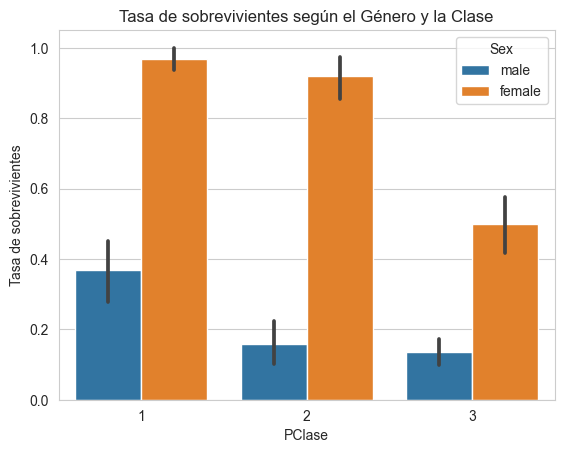

In [15]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Tasa de sobrevivientes")
plt.xlabel("PClase")
plt.title("Tasa de sobrevivientes según el Género y la Clase")

Se aprecia una constante, la cual indica que sin importar la clase en la que viajaban, las mujeres tenían más probabilidades de sobrevivir que los hombres.

Text(0.5, 1.0, 'Tasa de sobrevivientes según el Género y la Clase')

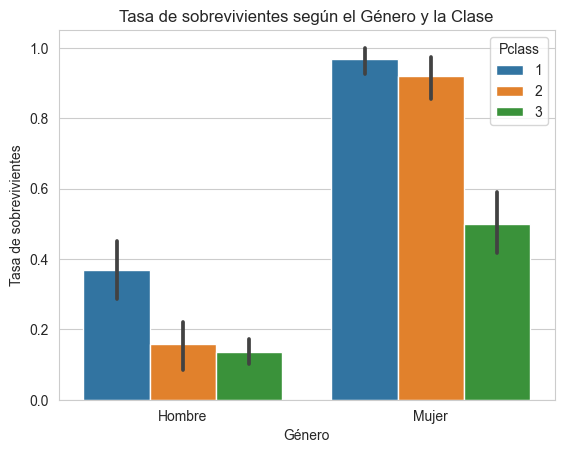

In [16]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Tasa de sobrevivientes")
plt.xlabel("Género")
plt.xticks([0,1],["Hombre", "Mujer"])
plt.title("Tasa de sobrevivientes según el Género y la Clase")

La clase en la que viajaban los pasajeros también influye en la probabilidad de sobrevivir. Ya que se puede observar que gran parte de los sobrevivientes viajaban en primera clase, por sobre las otras dos clases.

<br/>

**Edad**

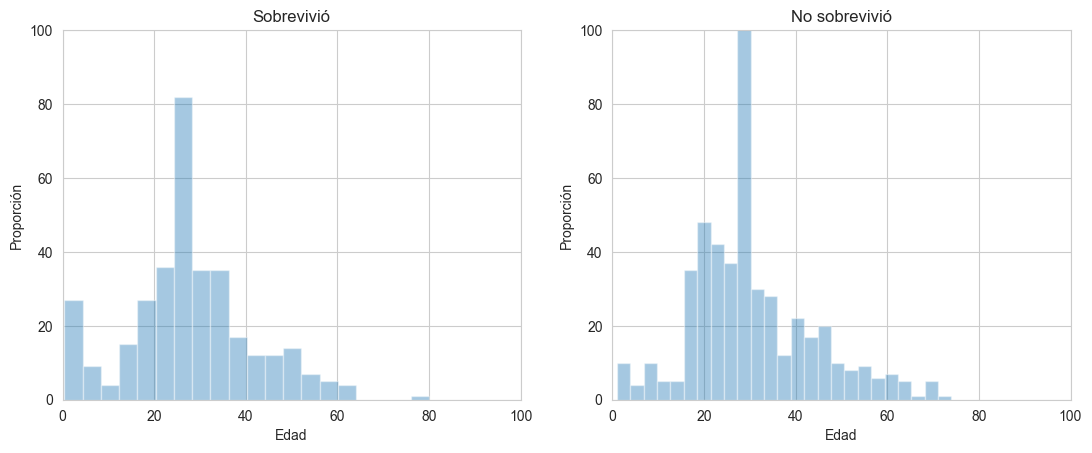

In [17]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Sobrevivió")
plt.ylabel("Proporción")
plt.xlabel("Edad")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("No sobrevivió")
plt.ylabel("Proporción")
plt.xlabel("Edad")
plt.subplots_adjust(right=1.7)
plt.show()

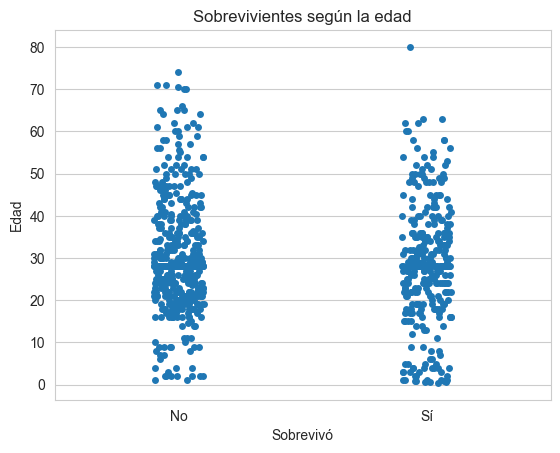

In [18]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)
plt.title("Sobrevivientes según la edad")
plt.xlabel("Sobrevivó")
plt.ylabel("Edad")
plt.xticks([0,1],["No","Sí"])
plt.show()

Al parecer los pasajeros más jóvenes tenían mayor probabilidad de sobrevivir, y los pasajeros más viejos tenían menor probabilidad de sobrevivir. Esto se puede ver en la distribución de los puntos o en el histograma.

Aquí se deja una gráfica que acumula los datos relacionándolos en pares con las demás características del dataset.

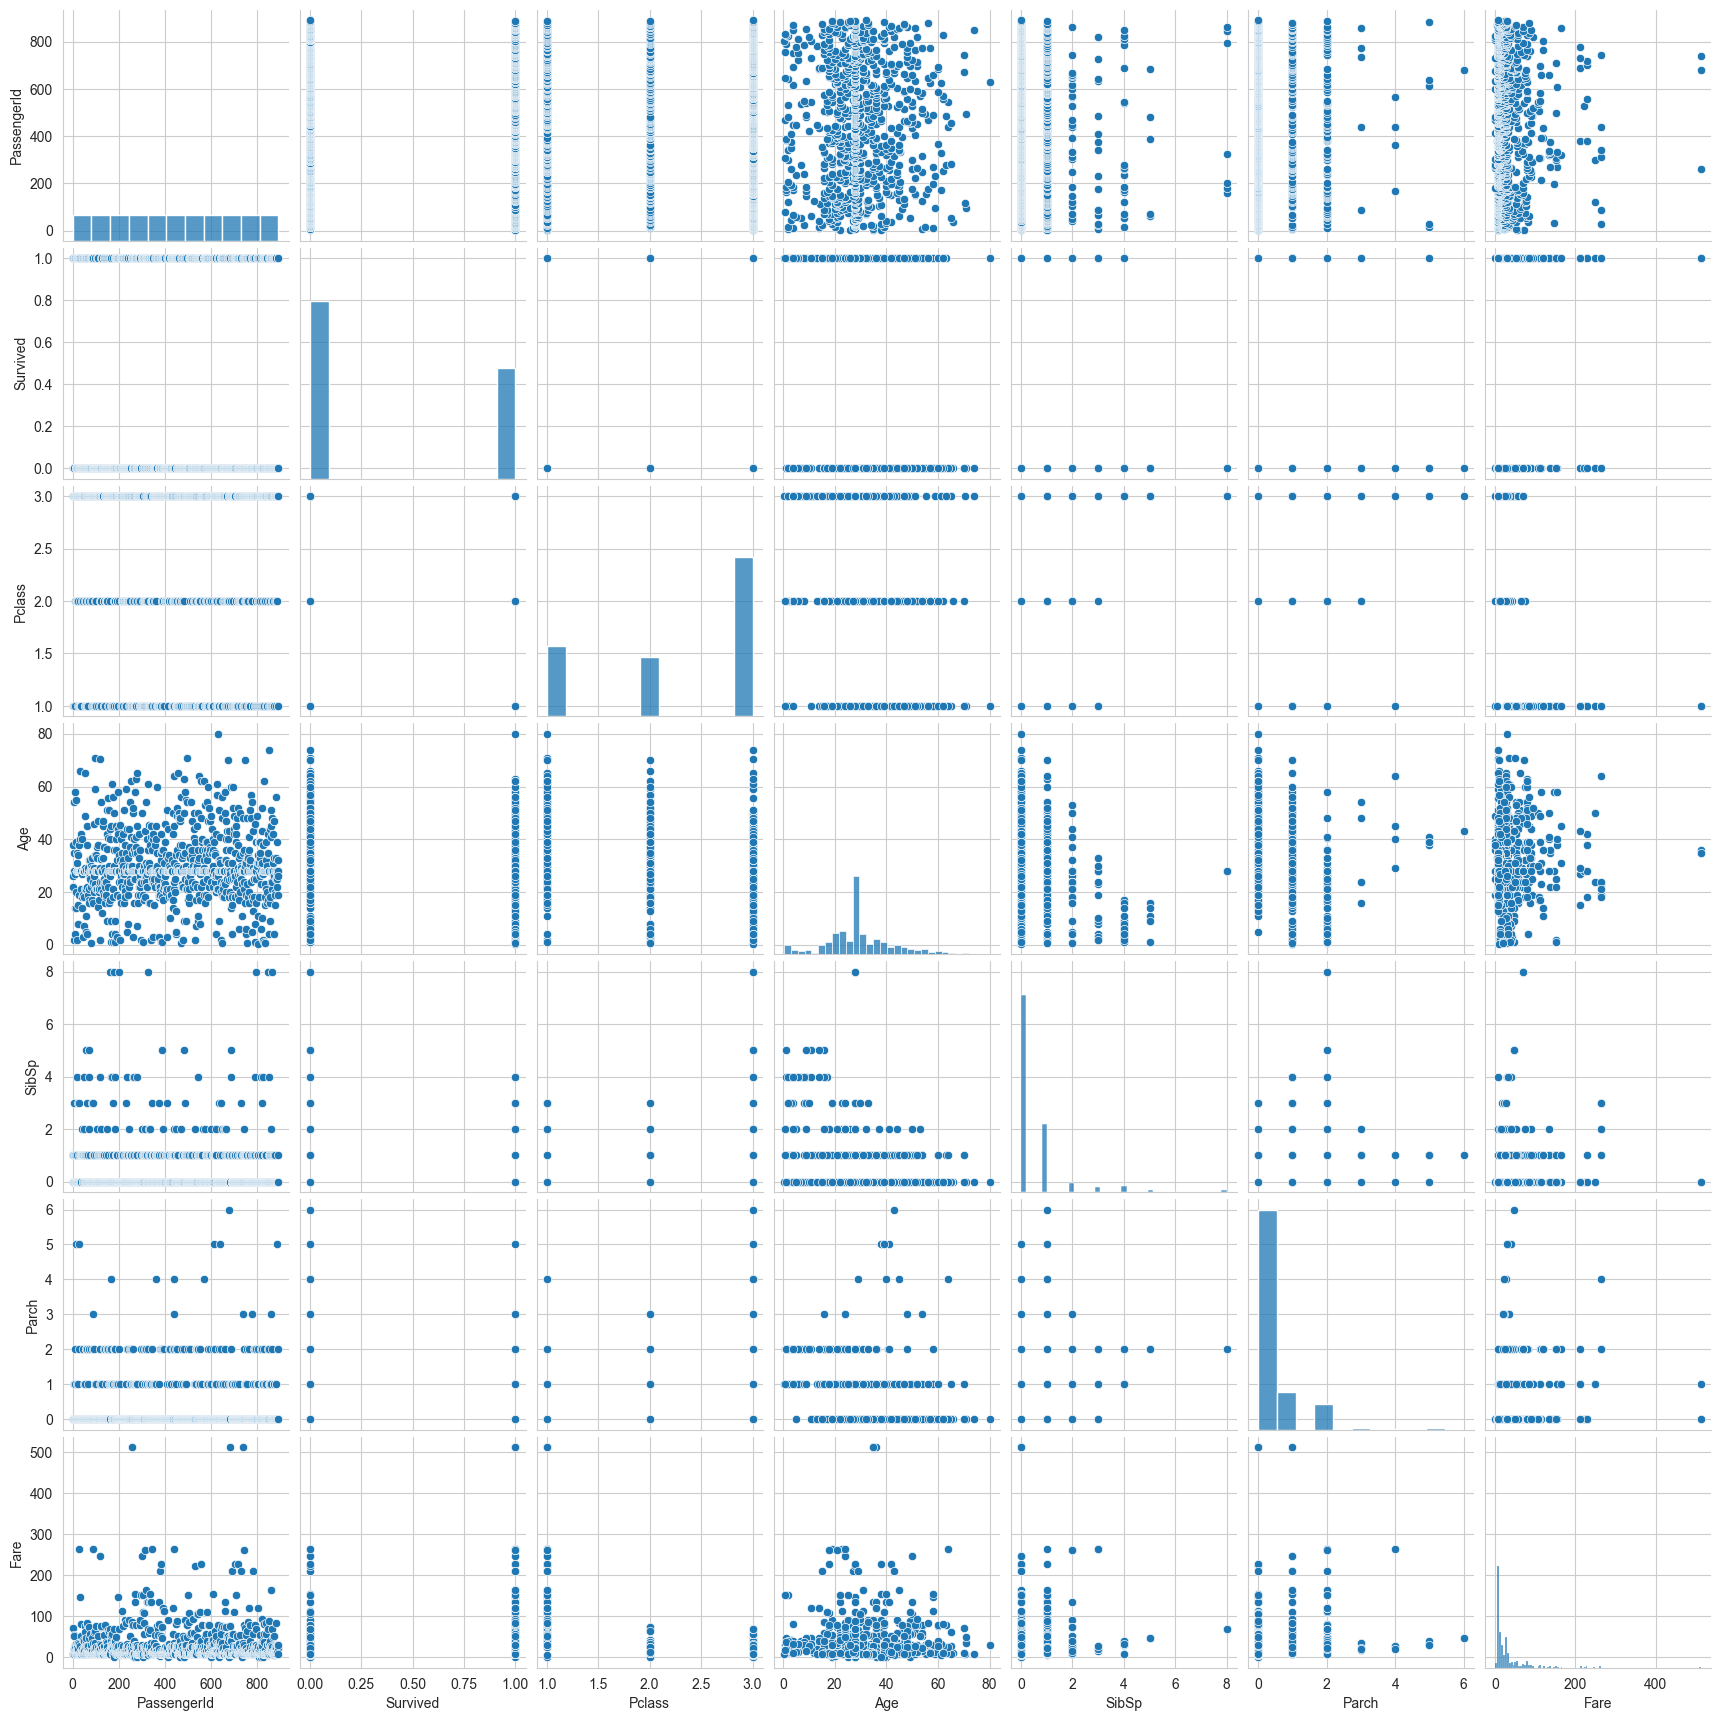

In [19]:
sns.pairplot(training)

<br/>

## 5. Ingeniería de características

Debido a que los valores en las columnas Sexo y Embarcado son valores categóricos, tenemos que representar estas cadenas como valores numéricos para poder realizar nuestra clasificación con nuestro modelo. También podemos realizar este proceso mediante One-Hot-Encoding.

In [20]:
training.sample(5) # Muestra 5 filas aleatorias del dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
109,110,1,3,"Moran, Miss. Bertha",female,28.0,1,0,24.1500,Q
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26.0000,S
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,79.2000,C
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,15.7417,C
468,469,0,3,"Scanlan, Mr. James",male,28.0,0,0,7.7250,Q


In [21]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
175,1067,2,"Brown, Miss. Edith Eileen",female,15.0,0,2,39.0000,S
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,262.3750,C
292,1184,3,"Nasr, Mr. Mustafa",male,27.0,0,0,7.2292,C
11,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,26.0000,S
382,1274,3,"Risien, Mrs. Samuel (Emma)",female,27.0,0,0,14.5000,S


Se procederá a cambiar los valores de las columnas `Sex` y `Embarked` por valores numéricos. En la columna `Sex` se reemplazará `male` por 0 y `female` por 1. En la columna `Embarked` se reemplazará `S` por 0, `C` por 1 y `Q` por 2. 

Esto lo haremos en ambos dataset para preparar los datos para el Machine Learning.

In [22]:
set(training["Embarked"])

{'C', 'Q', 'S'}

In [23]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(training["Sex"])

encoded_sex_training = le_sex.transform(training["Sex"])
training["Sex"] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing["Sex"])
testing["Sex"] = encoded_sex_testing

le_embarked = LabelEncoder()
le_embarked.fit(training["Embarked"])

encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing

#Here's how to do it manually in Python without packages
"""
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2
"""

'\ntraining.loc[training["Sex"] == "male", "Sex"] = 0\ntraining.loc[training["Sex"] == "female", "Sex"] = 1\n\ntraining.loc[training["Embarked"] == "S", "Embarked"] = 0\ntraining.loc[training["Embarked"] == "C", "Embarked"] = 1\ntraining.loc[training["Embarked"] == "Q", "Embarked"] = 2\n\ntesting.loc[testing["Sex"] == "male", "Sex"] = 0\ntesting.loc[testing["Sex"] == "female", "Sex"] = 1\n\ntesting.loc[testing["Embarked"] == "S", "Embarked"] = 0\ntesting.loc[testing["Embarked"] == "C", "Embarked"] = 1\ntesting.loc[testing["Embarked"] == "Q", "Embarked"] = 2\n'

En los bloques de código anteriores se representan 2 formas distintas de llegar al mismo resultado. La primera emplea la librería `sklearn` y la segunda emplea la librería `pandas`. Pero ambas realizan el mismo proceso.


In [24]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0,1,2,151.5500,2
495,496,0,3,"Yousseff, Mr. Gerious",1,28.0,0,0,14.4583,0
592,593,0,3,"Elsbury, Mr. William James",1,47.0,0,0,7.2500,2
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",0,33.0,1,2,27.7500,2
103,104,0,3,"Johansson, Mr. Gustaf Joel",1,33.0,0,0,8.6542,2


In [25]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
70,962,3,"Mulvihill, Miss. Bertha E",0,24.0,0,0,7.750,1
246,1138,2,"Karnes, Mrs. J Frank (Claire Bennett)",0,22.0,0,0,21.000,2
50,942,1,"Smith, Mr. Lucien Philip",1,24.0,1,0,60.000,2
17,909,3,"Assaf, Mr. Gerios",1,21.0,0,0,7.225,0
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",0,26.0,0,2,13.775,2


### Creando Características Sintéticas

Algunas veces es útil crear características sintéticas que puedan ayudar a mejorar el rendimiento de nuestro modelo. En este caso, crearemos una característica sintética llamada `FamilySize` que combina las características `SibSp` y `Parch`. Esto nos permitirá eliminar las características `SibSp` y `Parch` del dataset.

In [26]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

La característica `IsAlone` es otra característica sintética que creamos para indicar si el pasajero viajaba solo o no. Esta característica se crea a partir de la característica `FamilySize` y se elimina del dataset la característica `FamilySize`.

In [27]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

Aunque no lo parezca, también podemos extraer alguna información útil de la columna de nombre. No los nombres reales en sí, sino el título de sus nombres, como Sra. o Sr. Esto también puede proporcionar una pista sobre si el pasajero sobrevivió o no. Por lo tanto podemos extraer este título y luego codificarlo como lo hicimos para Sex y Embarked.

In [28]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True) 
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [29]:
training.head() # El Título se ha añadido al dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1,Mr


In [30]:
titles = set(training["Title"]) # convirtiendolo en un set se eliminan los duplicados
print(titles)

{'Rev', 'Miss', 'Mr', 'Major', 'Sir', 'Capt', 'Dr', 'Ms', 'Lady', 'Countess', 'Mme', 'Col', 'Don', 'Mrs', 'Jonkheer', 'Master', 'Mlle'}


In [31]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    
print(frequency_titles)

[6, 182, 517, 2, 1, 1, 7, 1, 1, 1, 1, 2, 1, 125, 1, 40, 2]


Conociendo el título de cada pasajero, podemos conocer que cantidad de pasajero habían por título. Esto nos puede ayudar a determinar si el título es relevante o no para el análisis.

In [32]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)

      Titles  Frequency
0        Rev          6
1       Miss        182
2         Mr        517
3      Major          2
4        Sir          1
5       Capt          1
6         Dr          7
7         Ms          1
8       Lady          1
9   Countess          1
10       Mme          1
11       Col          2
12       Don          1
13       Mrs        125
14  Jonkheer          1
15    Master         40
16      Mlle          2


A continuación se procederá a reemplazar algunos títulos por otros más comunes, para poder pasarlos posteriormente a valores numéricos.

In [33]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

le_title = LabelEncoder() # Se crea un objeto LabelEncoder
le_title.fit(training["Title"]) # Se ajusta el objeto a la columna Title

encoded_title_training = le_title.transform(training["Title"]) # Se transforma la columna Title
training["Title"] = encoded_title_training # Se reemplaza la columna Title por la transformada
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

# Nuevamente, se puede hacer manualmente sin usar LabelEncoder
"""
training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Dr", "Title"] = 4
training.loc[training["Title"] == "Rev", "Title"] = 5
training.loc[training["Title"] == "Other", "Title"] = 6

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Dr", "Title"] = 4
testing.loc[testing["Title"] == "Rev", "Title"] = 5
testing.loc[testing["Title"] == "Other", "Title"] = 6
"""

'\ntraining.loc[training["Title"] == "Miss", "Title"] = 0\ntraining.loc[training["Title"] == "Mr", "Title"] = 1\ntraining.loc[training["Title"] == "Mrs", "Title"] = 2\ntraining.loc[training["Title"] == "Master", "Title"] = 3\ntraining.loc[training["Title"] == "Dr", "Title"] = 4\ntraining.loc[training["Title"] == "Rev", "Title"] = 5\ntraining.loc[training["Title"] == "Other", "Title"] = 6\n\ntesting.loc[testing["Title"] == "Miss", "Title"] = 0\ntesting.loc[testing["Title"] == "Mr", "Title"] = 1\ntesting.loc[testing["Title"] == "Mrs", "Title"] = 2\ntesting.loc[testing["Title"] == "Master", "Title"] = 3\ntesting.loc[testing["Title"] == "Dr", "Title"] = 4\ntesting.loc[testing["Title"] == "Rev", "Title"] = 5\ntesting.loc[testing["Title"] == "Other", "Title"] = 6\n'

In [34]:
training.drop("Name", axis = 1, inplace = True) # Se elimina la columna Name
testing.drop("Name", axis = 1, inplace = True) # Se elimina la columna Name

In [35]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
127,128,1,3,1,24.0,0,0,7.1417,2,1,1,3
856,857,1,1,0,45.0,1,1,164.8667,2,3,0,4
370,371,1,1,1,25.0,1,0,55.4417,0,2,0,3
242,243,0,2,1,29.0,0,0,10.5000,2,1,1,3
886,887,0,2,1,27.0,0,0,13.0000,2,1,1,6


In [36]:
testing.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
215,1107,1,1,42.0,0,0,42.50,2,1,1,3
403,1295,1,1,17.0,0,0,47.10,2,1,1,3
92,984,1,0,27.0,1,2,52.00,2,4,0,4
352,1244,2,1,18.0,0,0,73.50,2,1,1,3
255,1147,3,1,27.0,0,0,7.55,2,1,1,3


Actualmente todos los valores están en forma numérica. Parecería listo para introducir el modelo, pero antes debemos observar las características Edad y Tarifa.

<br/>

## 6. Reescalado de características

Como los valores de las características Edad y Tarifa están en diferentes rangos, es necesario reescalarlos para que los valores estén en el mismo rango. Esto se puede hacer mediante la función `MinMaxScaler` de `sklearn`. O también con un `StandardScaler` de `sklearn`, el cual utilizaremos en este caso.

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Necesitamos remodelar nuestros datos ya que el Scaler toma arreglos
ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

In [38]:
testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,892,3,1,0.386231,0,0,-0.497413,1,1,1,3
1,893,3,0,1.371370,1,0,-0.512278,2,2,0,4
2,894,2,1,2.553537,0,0,-0.464100,1,1,1,3
3,895,3,1,-0.204852,0,0,-0.482475,2,1,1,3
4,896,3,0,-0.598908,1,1,-0.417492,2,3,0,4


In [39]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,2,1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,1,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,4,1,1,0,0.433312,1,0,0.420730,2,2,0,4
4,5,0,3,1,0.433312,0,0,-0.486337,2,1,1,3


Realizar este proceso permite que el modelo no se vea afectado por las diferencias de rango entre las características.

<br/>

## 7. Ajuste, Optimización y Predicción del modelo

Ahora que los datos se han procesado de forma correcta se puede comenzar a evaluar los modelos de Machine Learning. Para ello se utilizará la librería `sklearn` y se importarán los modelos que se utilizarán.

**Sklearn Models to Test**

In [40]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

Para evaluar el rendimiento de nuestro modelo, podemos utilizar las funciones make_scorer y precision_score de sklearn metrics.

In [41]:
from sklearn.metrics import make_scorer, accuracy_score 

También podemos usar una validación cruzada de GridSearch para encontrar los parámetros óptimos para el modelo con el que elegimos trabajar y usar para predecir en nuestro conjunto de pruebas.

In [42]:
from sklearn.model_selection import GridSearchCV

**Definición de características en el conjunto de entrenamiento/prueba**

In [43]:
X_train = training.drop(labels=["PassengerId", "Survived"], axis=1) # Define el conjunto de caracteristicas de training
y_train = training["Survived"] # Define el conjunto de resultados de training
X_test = testing.drop("PassengerId", axis=1) # Define el conjunto de caracteristicas de testing
# No tenemos y_test, eso es lo que estamos tratando de predecir con nuestro modelo

In [44]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,1,0,0.433312,1,0,0.420730,2,2,0,4
4,3,1,0.433312,0,0,-0.486337,2,1,1,3


**Conjunto de datos de validación**

Aunque ya tenemos un conjunto de prueba, generalmente es fácil hacer que los clasificadores se ajusten demasiado a los datos. Por lo tanto, es útil tener un tercer conjunto de datos llamado conjunto de validación para asegurarnos de que nuestro modelo no se ajuste en exceso a los datos. Podemos crear este tercer conjunto de datos utilizando la función train_test_split de sklearn. También podemos utilizar el conjunto de validación para evaluar la precisión general de nuestro modelo.

In [45]:
from sklearn.model_selection import train_test_split # Para crear conjuntos de entrenamiento y validación

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid y y_valid son los conjuntos de validación

**SVC Model**

In [46]:
svc_clf = SVC() 

parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [47]:
print("La puntuación del modelo SVC es: " + str(acc_svc))

La puntuación del modelo SVC es: 0.8212290502793296


**LinearSVC Model**

In [48]:
linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept": [True, False], "max_iter": [100, 500, 1000, 1500]} #

grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score)) # scoring es la métrica que se usará para evaluar el modelo
grid_linsvc.fit(X_training, y_training) # Se ajusta el modelo

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for LinearSVC is: " + str(acc_linsvc))

The Score for LinearSVC is: 0.7932960893854749


**RandomForest Model**

In [49]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5, 10]} #

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_ # Se obtiene el mejor estimador

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid) 
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is: " + str(acc_rf))

The Score for Random Forest is: 0.8156424581005587


**LogisiticRegression Model**

In [50]:
logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))

The Score for Logistic Regression is: 0.8100558659217877


**KNeighbors Model**

In [51]:
knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.7653631284916201


**GaussianNB Model**

In [52]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.776536312849162


**DecisionTree Model**

In [53]:
dt_clf = DecisionTreeClassifier()

parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": ["auto", "sqrt", "log2"]}

grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

The Score for Decision Tree is: 0.8156424581005587


**XGBoost Model**

In [54]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier()

parameters_xg = {"objective" : ["reg:linear"], "n_estimators" : [5, 10, 15, 20]}

grid_xg = GridSearchCV(xg_clf, parameters_xg, scoring=make_scorer(accuracy_score))
grid_xg.fit(X_training, y_training)

xg_clf = grid_xg.best_estimator_

xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print("The Score for XGBoost is: " + str(acc_xg))

[01:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

<br/>

## 8. Evaluación performance del modelo

Después de hacer tantos modelos y predicciones, debemos evaluar y ver qué modelo funcionó mejor y qué modelo usar en nuestro conjunto de pruebas.

In [55]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
7,XGBClassifier,0.843575
0,SVC,0.821229
2,Random Forest,0.815642
6,Decision Tree,0.815642
3,Logistic Regression,0.810056
1,Linear SVC,0.793296
5,Gaussian Naive Bayes,0.776536
4,K Nearest Neighbors,0.765363


Vemos que el XGBoost es el que mejor resultado nos dió. 

## 9. Envío

Creemos un DataFrame para enviar a la competencia con nuestras predicciones de nuestro modelo.

In [56]:
svc_clf.fit(X_train, y_train) # Se ajusta el modelo con todo el dataset de training


[LibSVM]

SVC(probability=True, verbose=True)

In [57]:
submission_predictions = svc_clf.predict(X_test)

In [58]:
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)


Este es el final del ejercicio 1, el cual ha consistido en la exploración y análisis de los datos, la preparación de los datos para el Machine Learning, la creación de modelos de Machine Learning y la evaluación de los modelos.
